In [286]:
import math
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [287]:
ROTAXIS = 'pitch'
TESTNUM = 1
data_dir = f'data/{ROTAXIS}/test_{TESTNUM}'

# Function Libs

In [288]:
def load_data(data_dir):
    raw_data = pd.read_csv(os.path.join(data_dir, 'raw_data.csv'), header=None).to_numpy().reshape(-1, 18)
    raw_data_force = pd.read_csv(os.path.join(data_dir, 'raw_data.csv'), usecols=lambda x: x not in [3, 4, 5, 9, 10, 11, 15, 16, 17], header=None).to_numpy().reshape(-1, 9)
    transformed_data = pd.read_csv(os.path.join(data_dir, 'transformed_data.csv'), usecols=lambda x: x not in [3, 4, 5, 9, 10, 11, 15, 16, 17], header=None).to_numpy().reshape(-1, 9)
    return raw_data, raw_data_force, transformed_data

In [289]:
def pca_analysis(data, n_components=9, force_threshold=0.1):
    print(f"Before clipping, data samples: {data.shape[0]}")
    if n_components == 9:
        s1_force = data[:, 0:3]
        s2_force = data[:, 3:6]
        s3_force = data[:, 6:9]
        s1_norm_force = np.linalg.norm(s1_force, axis=1).reshape(-1, 1)
        s2_norm_force = np.linalg.norm(s2_force, axis=1).reshape(-1, 1)
        s3_norm_force = np.linalg.norm(s3_force, axis=1).reshape(-1, 1)
        mask_indexes = []
        for i in range(s1_norm_force.shape[0]):
            if s1_norm_force[i] < force_threshold and s2_norm_force[i] < force_threshold and s3_norm_force[i] < force_threshold:
                mask_indexes.append(i)
        data_filtered = np.delete(data, mask_indexes, axis=0)
    elif n_components == 18:
        s1_force = data[:, 0:3]
        s2_force = data[:, 6:9]
        s3_force = data[:, 12:15]
        s1_norm_force = np.linalg.norm(s1_force, axis=1).reshape(-1, 1)
        s2_norm_force = np.linalg.norm(s2_force, axis=1).reshape(-1, 1)
        s3_norm_force = np.linalg.norm(s3_force, axis=1).reshape(-1, 1)
        mask_indexes = []
        for i in range(s1_norm_force.shape[0]):
            if s1_norm_force[i] < force_threshold and s2_norm_force[i] < force_threshold and s3_norm_force[i] < force_threshold:
                mask_indexes.append(i)
        data_filtered = np.delete(data, mask_indexes, axis=0)
    print(f"After clipping, data samples: {data_filtered.shape[0]}")
    pca = PCA(n_components=n_components)
    pca.fit_transform(data_filtered)
    return pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

In [290]:
def plot_pca_heatmap_horizontal_forces(pca_components, eigenvalues, explained_variance_ratio):

    # ==== Print PCA summary ====
    print("PC  | Eigenvalue | Variance Ratio")
    print("-" * 40)
    for i, (val, ratio) in enumerate(zip(eigenvalues, explained_variance_ratio)):
        print(f"PC{i+1:<3} | {val:<10.4f} | {ratio:.2%}")
    print("-" * 40)
    print(f"Sum of eigenvalues: {np.sum(eigenvalues):.4f}\n")

    # ==== Build DataFrame ====
    axis_labels = ['Fx', 'Fy', 'Fz'] * 3
    pc_names = [f'PC{i+1}' for i in range(pca_components.shape[0])]
    df = pd.DataFrame(pca_components.T, index=axis_labels, columns=pc_names)

    # ==== Plot ====
    plt.figure(figsize=(10, 10))

    ax = sns.heatmap(
        df,
        annot=True,
        fmt=".2f",
        cmap="RdBu_r",
        center=0,
        linewidths=0.6,              # cell borders
        linecolor="gray",            # gray boudnary lines
        cbar_kws={"label": "Loading Weight"}
    )

    # seperate three fingers
    for y in [3, 6]:
        ax.axhline(y, color="black", lw=2, ls="-")

    # label the finger
    for y, label in zip([1.5, 4.5, 7.5], ["Thumb", "Ring", "Index"]):
        ax.text(-0.05, y, label,
                va="center", ha="right",
                rotation=90,
                transform=ax.get_yaxis_transform())

    # boundaries
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)

    plt.title(f'{ROTAXIS.capitalize()}, Test {TESTNUM}: PCA Loadings')
    plt.xlabel("Principal Components")
    plt.ylabel("Force Sensors", labelpad=20)
    plt.tight_layout()
    plt.show()

In [291]:
def plot_pca_heatmap_horizontal_ft(pca_components, eigenvalues, explained_variance_ratio):

    # ==== Print PCA summary ====
    print("PC  | Eigenvalue | Variance Ratio")
    print("-" * 40)
    for i, (val, ratio) in enumerate(zip(eigenvalues, explained_variance_ratio)):
        print(f"PC{i+1:<3} | {val:<10.4f} | {ratio:.2%}")
    print("-" * 40)
    print(f"Sum of eigenvalues: {np.sum(eigenvalues):.4f}\n")

    # ==== Build DataFrame ====
    axis_labels = ['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'] * 3
    pc_names = [f'PC{i+1}' for i in range(pca_components.shape[0])]
    df = pd.DataFrame(pca_components.T, index=axis_labels, columns=pc_names)

    # ==== Plot ====
    plt.figure(figsize=(10, 10))

    ax = sns.heatmap(
        df,
        annot=True,
        fmt=".2f",
        cmap="RdBu_r",
        center=0,
        linewidths=0.6,              # cell borders
        linecolor="gray",            # gray boudnary lines
        cbar_kws={"label": "Loading Weight"}
    )

    # seperate three fingers
    for y in [6, 12]:
        ax.axhline(y, color="black", lw=2, ls="-")

    # label the finger
    for y, label in zip([3, 9, 15], ["Thumb", "Ring", "Index"]):
        ax.text(-0.05, y, label,
                va="center", ha="right",
                rotation=90,
                transform=ax.get_yaxis_transform())

    # boundaries
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)

    plt.title(f'{ROTAXIS.capitalize()}, Test {TESTNUM}: PCA Loadings')
    plt.xlabel("Principal Components")
    plt.ylabel("Force and Torque Sensors", labelpad=20)
    plt.tight_layout()
    plt.show()

In [292]:
def main_analysis(data_dir):
    raw_data, raw_data_force, transformed_data = load_data(data_dir)
    print("Raw FT Data Analysis:")
    raw_ft_pca_components, raw_ft_eigenvalues, raw_ft_explained_variance_ratio = pca_analysis(raw_data, raw_data.shape[1])
    plot_pca_heatmap_horizontal_ft(raw_ft_pca_components, raw_ft_eigenvalues, raw_ft_explained_variance_ratio)

    print("Raw Force Data Analysis:")
    raw_pca_components, raw_eigenvalues, raw_explained_variance_ratio = pca_analysis(raw_data_force, raw_data_force.shape[1])
    plot_pca_heatmap_horizontal_forces(raw_pca_components, raw_eigenvalues, raw_explained_variance_ratio)

    print("Transformed Data Analysis:")
    transformed_pca_components, transformed_eigenvalues, transformed_explained_variance_ratio = pca_analysis(transformed_data, transformed_data.shape[1])
    plot_pca_heatmap_horizontal_forces(transformed_pca_components, transformed_eigenvalues, transformed_explained_variance_ratio)

# Analysis

Raw FT Data Analysis:
Before clipping, data samples: 1602
After clipping, data samples: 1589
PC  | Eigenvalue | Variance Ratio
----------------------------------------
PC1   | 597.9299   | 45.90%
PC2   | 393.0492   | 30.17%
PC3   | 157.0888   | 12.06%
PC4   | 87.3790    | 6.71%
PC5   | 29.0909    | 2.23%
PC6   | 18.5364    | 1.42%
PC7   | 11.2751    | 0.87%
PC8   | 4.5134     | 0.35%
PC9   | 2.4173     | 0.19%
PC10  | 0.8469     | 0.07%
PC11  | 0.2501     | 0.02%
PC12  | 0.1505     | 0.01%
PC13  | 0.0830     | 0.01%
PC14  | 0.0447     | 0.00%
PC15  | 0.0246     | 0.00%
PC16  | 0.0153     | 0.00%
PC17  | 0.0097     | 0.00%
PC18  | 0.0062     | 0.00%
----------------------------------------
Sum of eigenvalues: 1302.7109



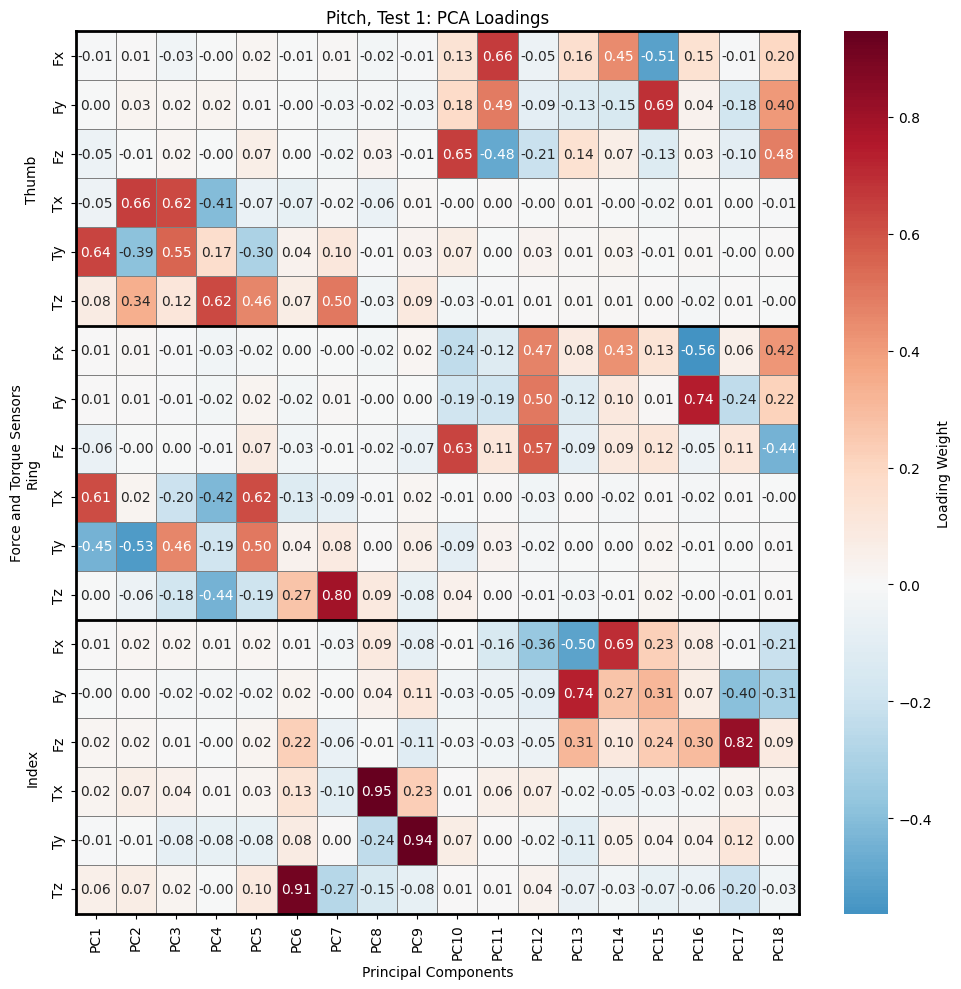

Raw Force Data Analysis:
Before clipping, data samples: 1602
After clipping, data samples: 1600
PC  | Eigenvalue | Variance Ratio
----------------------------------------
PC1   | 401.4011   | 57.04%
PC2   | 236.4894   | 33.61%
PC3   | 62.5567    | 8.89%
PC4   | 2.5699     | 0.37%
PC5   | 0.3016     | 0.04%
PC6   | 0.2409     | 0.03%
PC7   | 0.0567     | 0.01%
PC8   | 0.0288     | 0.00%
PC9   | 0.0268     | 0.00%
----------------------------------------
Sum of eigenvalues: 703.6720



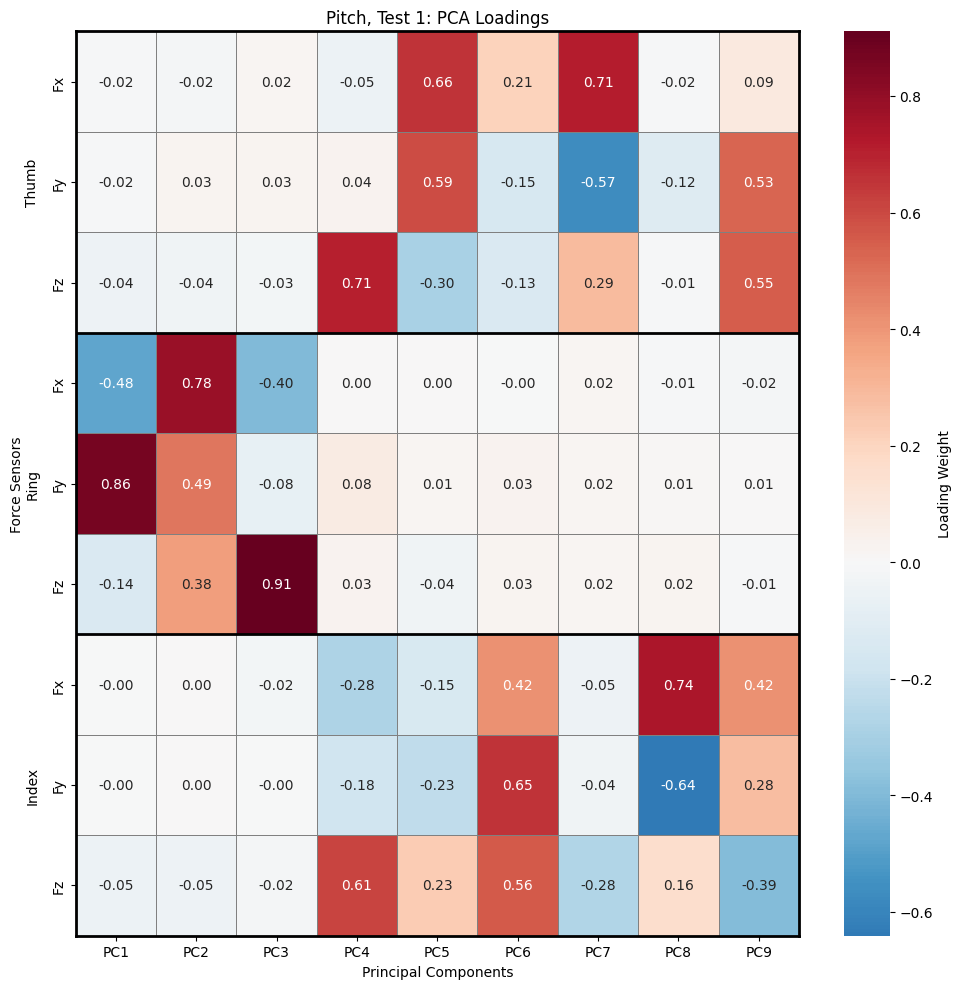

Transformed Data Analysis:
Before clipping, data samples: 1602
After clipping, data samples: 1506
PC  | Eigenvalue | Variance Ratio
----------------------------------------
PC1   | 4.4516     | 83.75%
PC2   | 0.4232     | 7.96%
PC3   | 0.2757     | 5.19%
PC4   | 0.1021     | 1.92%
PC5   | 0.0552     | 1.04%
PC6   | 0.0075     | 0.14%
PC7   | 0.0000     | 0.00%
PC8   | 0.0000     | 0.00%
PC9   | 0.0000     | 0.00%
----------------------------------------
Sum of eigenvalues: 5.3154



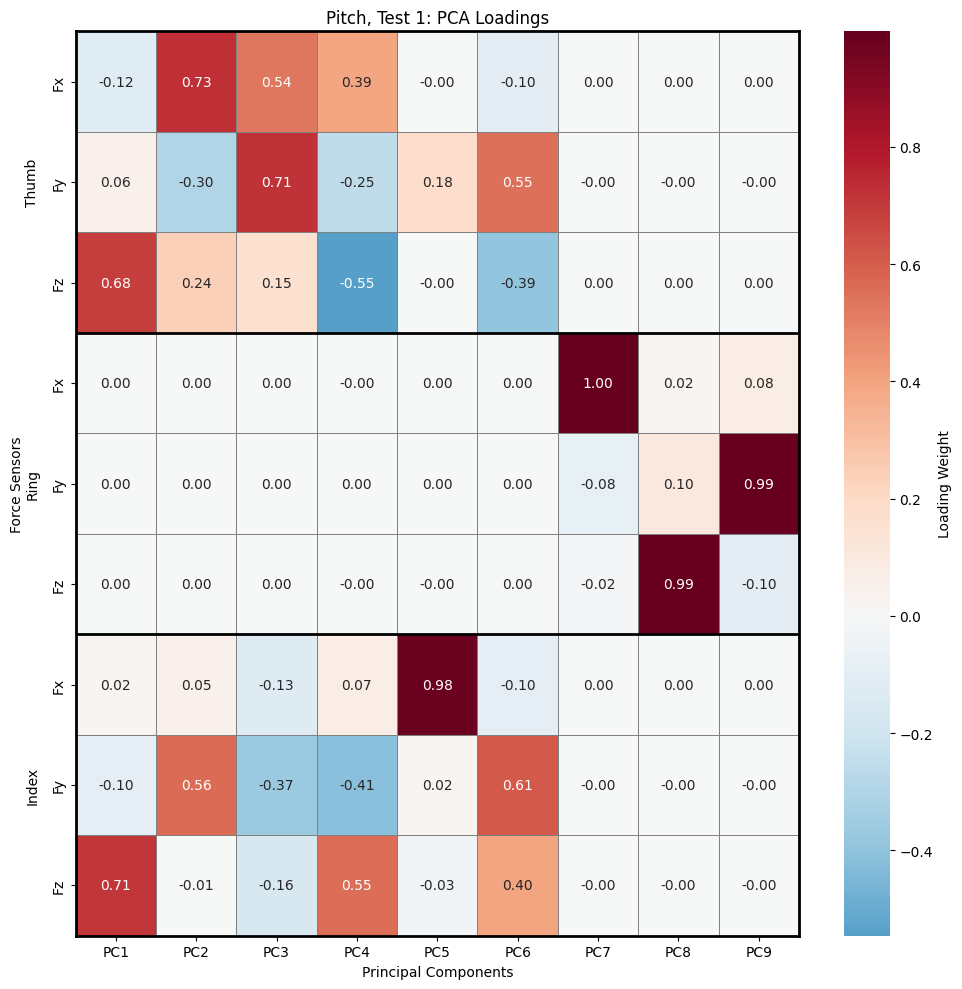

In [293]:
main_analysis(data_dir)